**Arsitektur YOLO**

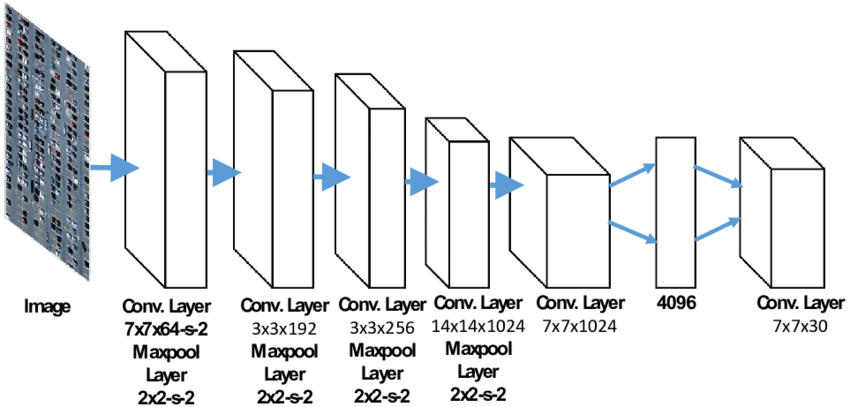

- Input: Gambar RGB (ukuran bebas, biasanya 448×448×3)
- Conv + MaxPool: 7×7 Conv (stride 2) → MaxPool 2×2 (stride 2)
- Conv + MaxPool: 3×3 Conv (192 filter) → MaxPool 2×2
- Conv Layers: Beberapa 3×3 Conv (256–1024 filter), ekstraksi fitur mendalam
- Max Pooling: Dilakukan setelah beberapa blok untuk reduksi spasial
- Conv Layer: 7×7×1024, menghasilkan fitur akhir
- Fully Connected: 4096 neuron, merangkum semua fitur
- Output Conv: 7×7×30, membagi gambar jadi 7×7 grid, tiap sel prediksi 2 bboxes dan 20 kelas

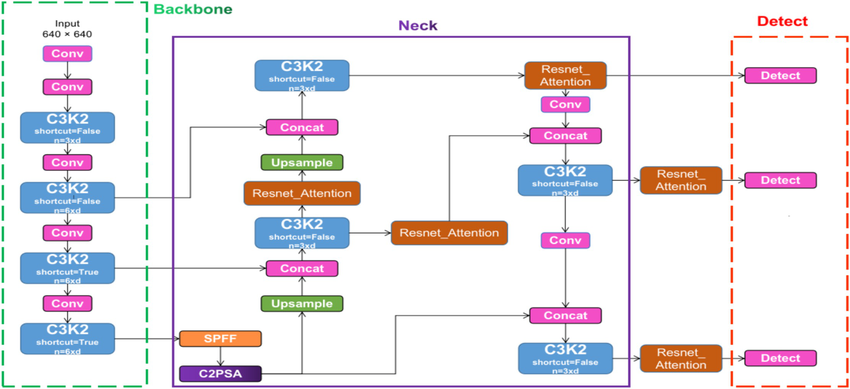

- Input: Gambar RGB 640×640
- Backbone: Conv → C3K2 block (shortcut true/false) → SPFF → C2PSA, untuk ekstraksi fitur awal
- Neck: FPN+PAN path, Upsample + Concat → C3K2 → Resnet_Attention, untuk memperkuat fitur multiskala
- Detect: Tiga cabang prediksi → Resnet_Attention → Deteksi pada tiga level resolusi

**Perbandingan YOLOv11 vs YOLOv1:**

YOLOv1 hanya menggunakan backbone CNN sederhana tanpa attention dan hanya satu layer deteksi di akhir (7×7 grid). YOLOv11 jauh lebih kompleks, menggunakan attention (Resnet_Attention), feature pyramid (Neck), dan deteksi multiskala di tiga tingkat resolusi. Hal ini membuat YOLOv11 jauh lebih akurat dan mampu mendeteksi objek kecil lebih baik daripada YOLOv1.

Perbedaan antara YOLOv1 dan YOLOv11 sangat signifikan baik dari segi arsitektur, kompleksitas, maupun performa deteksi. YOLOv1 adalah versi pertama dari keluarga YOLO (You Only Look Once) yang memperkenalkan pendekatan end-to-end untuk object detection. Ia membagi gambar input menjadi grid 7×7 dan pada setiap grid memprediksi bounding box dan kelas sekaligus. Meskipun sangat cepat, YOLOv1 memiliki kelemahan utama dalam mendeteksi objek kecil, overlapping objek, dan kurang akurat pada objek dengan variasi ukuran yang besar karena hanya menggunakan satu skala fitur.

Sebaliknya, YOLOv11 adalah arsitektur yang jauh lebih modern dan kompleks. Ia memanfaatkan backbone dengan C3K2 blocks (yang mirip dengan *bottleneck block* dari ResNet), serta attention mechanism (Resnet_Attention) untuk meningkatkan fokus jaringan pada fitur penting. Bagian Neck menggunakan struktur seperti *Feature Pyramid Network* (FPN) yang memungkinkan deteksi objek pada berbagai skala melalui proses *upsampling* dan *concatenation*. Ini membuat YOLOv11 sangat efektif dalam menangani objek kecil dan besar secara bersamaan. Selain itu, YOLOv11 memiliki tiga cabang deteksi pada resolusi berbeda, memungkinkan prediksi yang lebih presisi dibanding YOLOv1 yang hanya menggunakan satu output layer.

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadzulzhafran","key":"5686cda5cf3ae2a4d173988f5d2bc804"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d samuelayman/person

Dataset URL: https://www.kaggle.com/datasets/samuelayman/person
License(s): apache-2.0
 79% 122M/154M [00:00<00:00, 1.27GB/s]
100% 154M/154M [00:00<00:00, 1.17GB/s]


In [6]:
!unzip -q person.zip

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
import os
import shutil

# Path asal dataset
source_dir = "/content/person"
output_dir = "/content/dataset"

# Membuat struktur direktori target
os.makedirs(os.path.join(output_dir, "images/train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "images/val"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "images/test"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "labels/train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "labels/val"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "labels/test"), exist_ok=True)

def copy_split(split_type, new_split_type):
    img_src = os.path.join(source_dir, "Images", split_type)
    lbl_src = os.path.join(source_dir, "Labels", split_type)

    img_dst = os.path.join(output_dir, f"images/{new_split_type}")
    lbl_dst = os.path.join(output_dir, f"labels/{new_split_type}")

    for file_name in os.listdir(img_src):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            shutil.copy(os.path.join(img_src, file_name), os.path.join(img_dst, file_name))

            label_file = file_name.rsplit(".", 1)[0] + ".txt"
            label_path = os.path.join(lbl_src, label_file)
            if os.path.exists(label_path):
                shutil.copy(label_path, os.path.join(lbl_dst, label_file))

copy_split("Train", "train")
copy_split("Validate", "val")
copy_split("Test", "test")

# data.yaml
data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val
test: /content/dataset/images/test

nc: 1
names: ['person']
"""

with open(os.path.join(output_dir, "data.yaml"), "w") as f:
    f.write(data_yaml)

print("Dataset berhasil diatur ulang sesuai format YOLO!")


Dataset berhasil diatur ulang sesuai format YOLO!


In [9]:
model = YOLO("yolo11m.pt")

model.train(
    data="/content/dataset/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    device=0,
    patience=5,
    project="runs/train",
    name="exp"
)

100%|██████████| 38.8M/38.8M [00:00<00:00, 270MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2681.4±1386.1 MB/s, size: 192.3 KB)


train: Scanning /content/dataset/labels/train... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<00:00, 2308.09it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1070.0±1073.6 MB/s, size: 217.5 KB)


val: Scanning /content/dataset/labels/val... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 2107.83it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/train/exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.96G      1.187      1.754      1.329         56        640: 100%|██████████| 47/47 [00:28<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


                   all        200        769     0.0362      0.648      0.032     0.0159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.15G      1.741      1.925      1.763         29        640: 100%|██████████| 47/47 [00:26<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        200        769    0.00595      0.322    0.00458    0.00158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.08G      1.881      1.948      1.886         33        640: 100%|██████████| 47/47 [00:26<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        200        769      0.057      0.185      0.029    0.00942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.15G      1.812      2.081      1.832         56        640: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        200        769      0.234      0.398      0.231     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.09G      1.679      1.765       1.72         28        640: 100%|██████████| 47/47 [00:26<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


                   all        200        769      0.296      0.411      0.239     0.0992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.11G      1.608      1.686      1.668         34        640: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        200        769      0.512        0.5        0.5      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.08G      1.502      1.529      1.581         31        640: 100%|██████████| 47/47 [00:26<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        200        769      0.523      0.495      0.515      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.08G      1.419       1.43       1.55         43        640: 100%|██████████| 47/47 [00:26<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        200        769      0.715      0.546      0.651      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.09G      1.326      1.331      1.469         32        640: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        200        769      0.741      0.576      0.683      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.09G      1.218      1.214      1.395         35        640: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        200        769      0.703      0.655      0.735      0.473



10 epochs completed in 0.085 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 40.5MB
Optimizer stripped from runs/train/exp/weights/best.pt, 40.5MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        200        769      0.704      0.657      0.735      0.473
Speed: 0.3ms preprocess, 8.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/train/exp


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7991c8e85a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/dataset/images/test/0_579.jpg: 480x640 (no detections), 96.4ms
Speed: 2.2ms preprocess, 96.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/images/test/0_219.jpg: 448x640 3 persons, 82.1ms
Speed: 2.1ms preprocess, 82.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/test/0_494.jpg: 576x640 4 persons, 128.0ms
Speed: 2.6ms preprocess, 128.0ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 /content/dataset/images/test/0_11.jpg: 448x640 4 persons, 40.8ms
Speed: 5.4ms preprocess, 40.8ms inference, 6.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/test/0_709.jpg: 640x448 (no detections), 131.9ms
Speed: 6.1ms preprocess, 131.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/dataset/images/test/0_171.jpg: 480x640 2 persons, 30.0ms
Speed: 1.5ms preprocess, 30.0ms infere

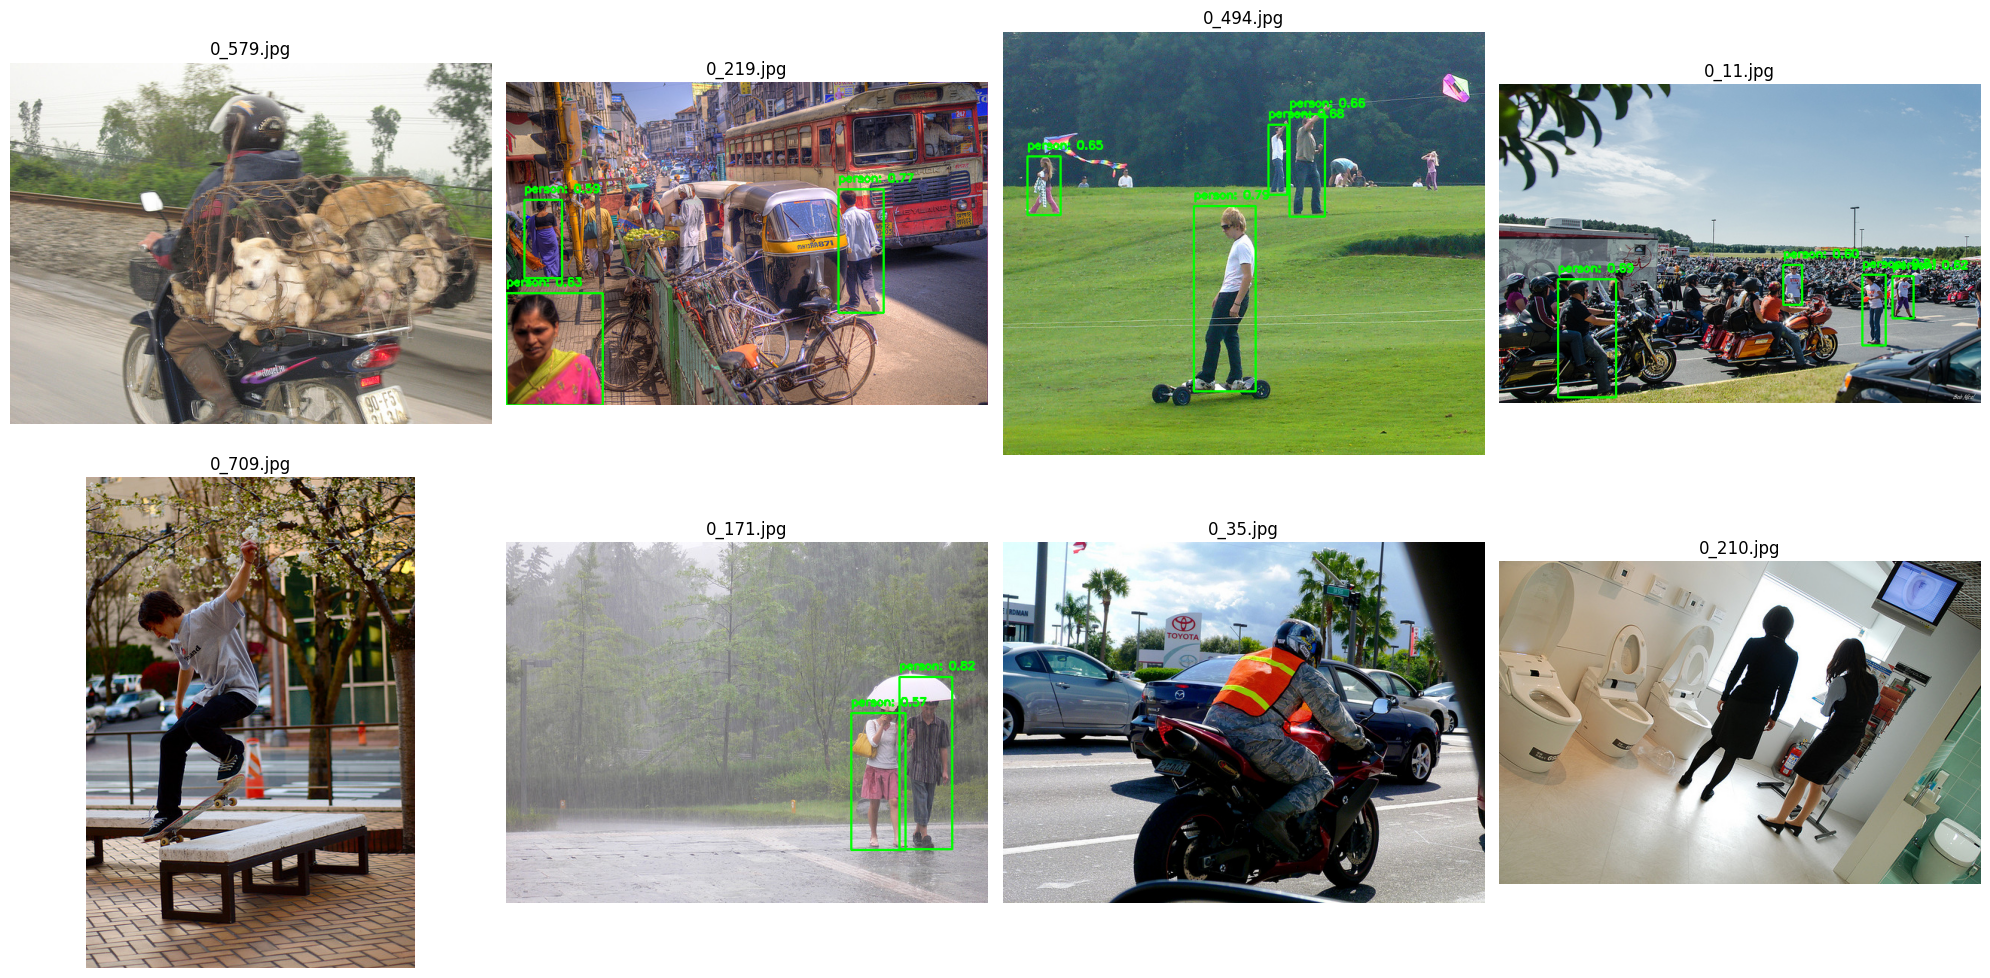

In [12]:
import random

model = YOLO("/content/runs/train/exp/weights/best.pt")

test_images_dir = "/content/dataset/images/test"
test_images = random.sample(os.listdir(test_images_dir), 8)

plt.figure(figsize=(20, 10))
for i, img_name in enumerate(test_images):
    img_path = os.path.join(test_images_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model.predict(img_path, conf=0.5)

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        labels = result.boxes.cls.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            x1, y1, x2, y2 = map(int, box)
            class_name = result.names[int(label)]
            label_text = f"{class_name}: {score:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)

plt.tight_layout()
plt.show()

In [13]:
from google.colab.patches import cv2_imshow

In [15]:
video_path = "/content/test_video1.mp4"  # ganti sesuai nama file Anda
cap = cv2.VideoCapture(video_path)

# Simpan output ke file baru
output_path = "/content/output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop frame demi frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict objek di frame ini
    results = model.predict(frame, conf=0.5)

    # Ambil hasil dan gambar bounding box
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        labels = result.boxes.cls.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            x1, y1, x2, y2 = map(int, box)
            class_name = result.names[int(label)]
            label_text = f"{class_name}: {score:.2f}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 255, 0), 2)

    # Simpan ke output video
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Bersihkan
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 53.2ms
Speed: 4.9ms preprocess, 53.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.7ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.8ms preprocess, 24.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.7ms preprocess, 24.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 5.7ms preprocess, 24.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.7ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.9ms preprocess, 24.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.1ms
Speed: 3.5ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 38

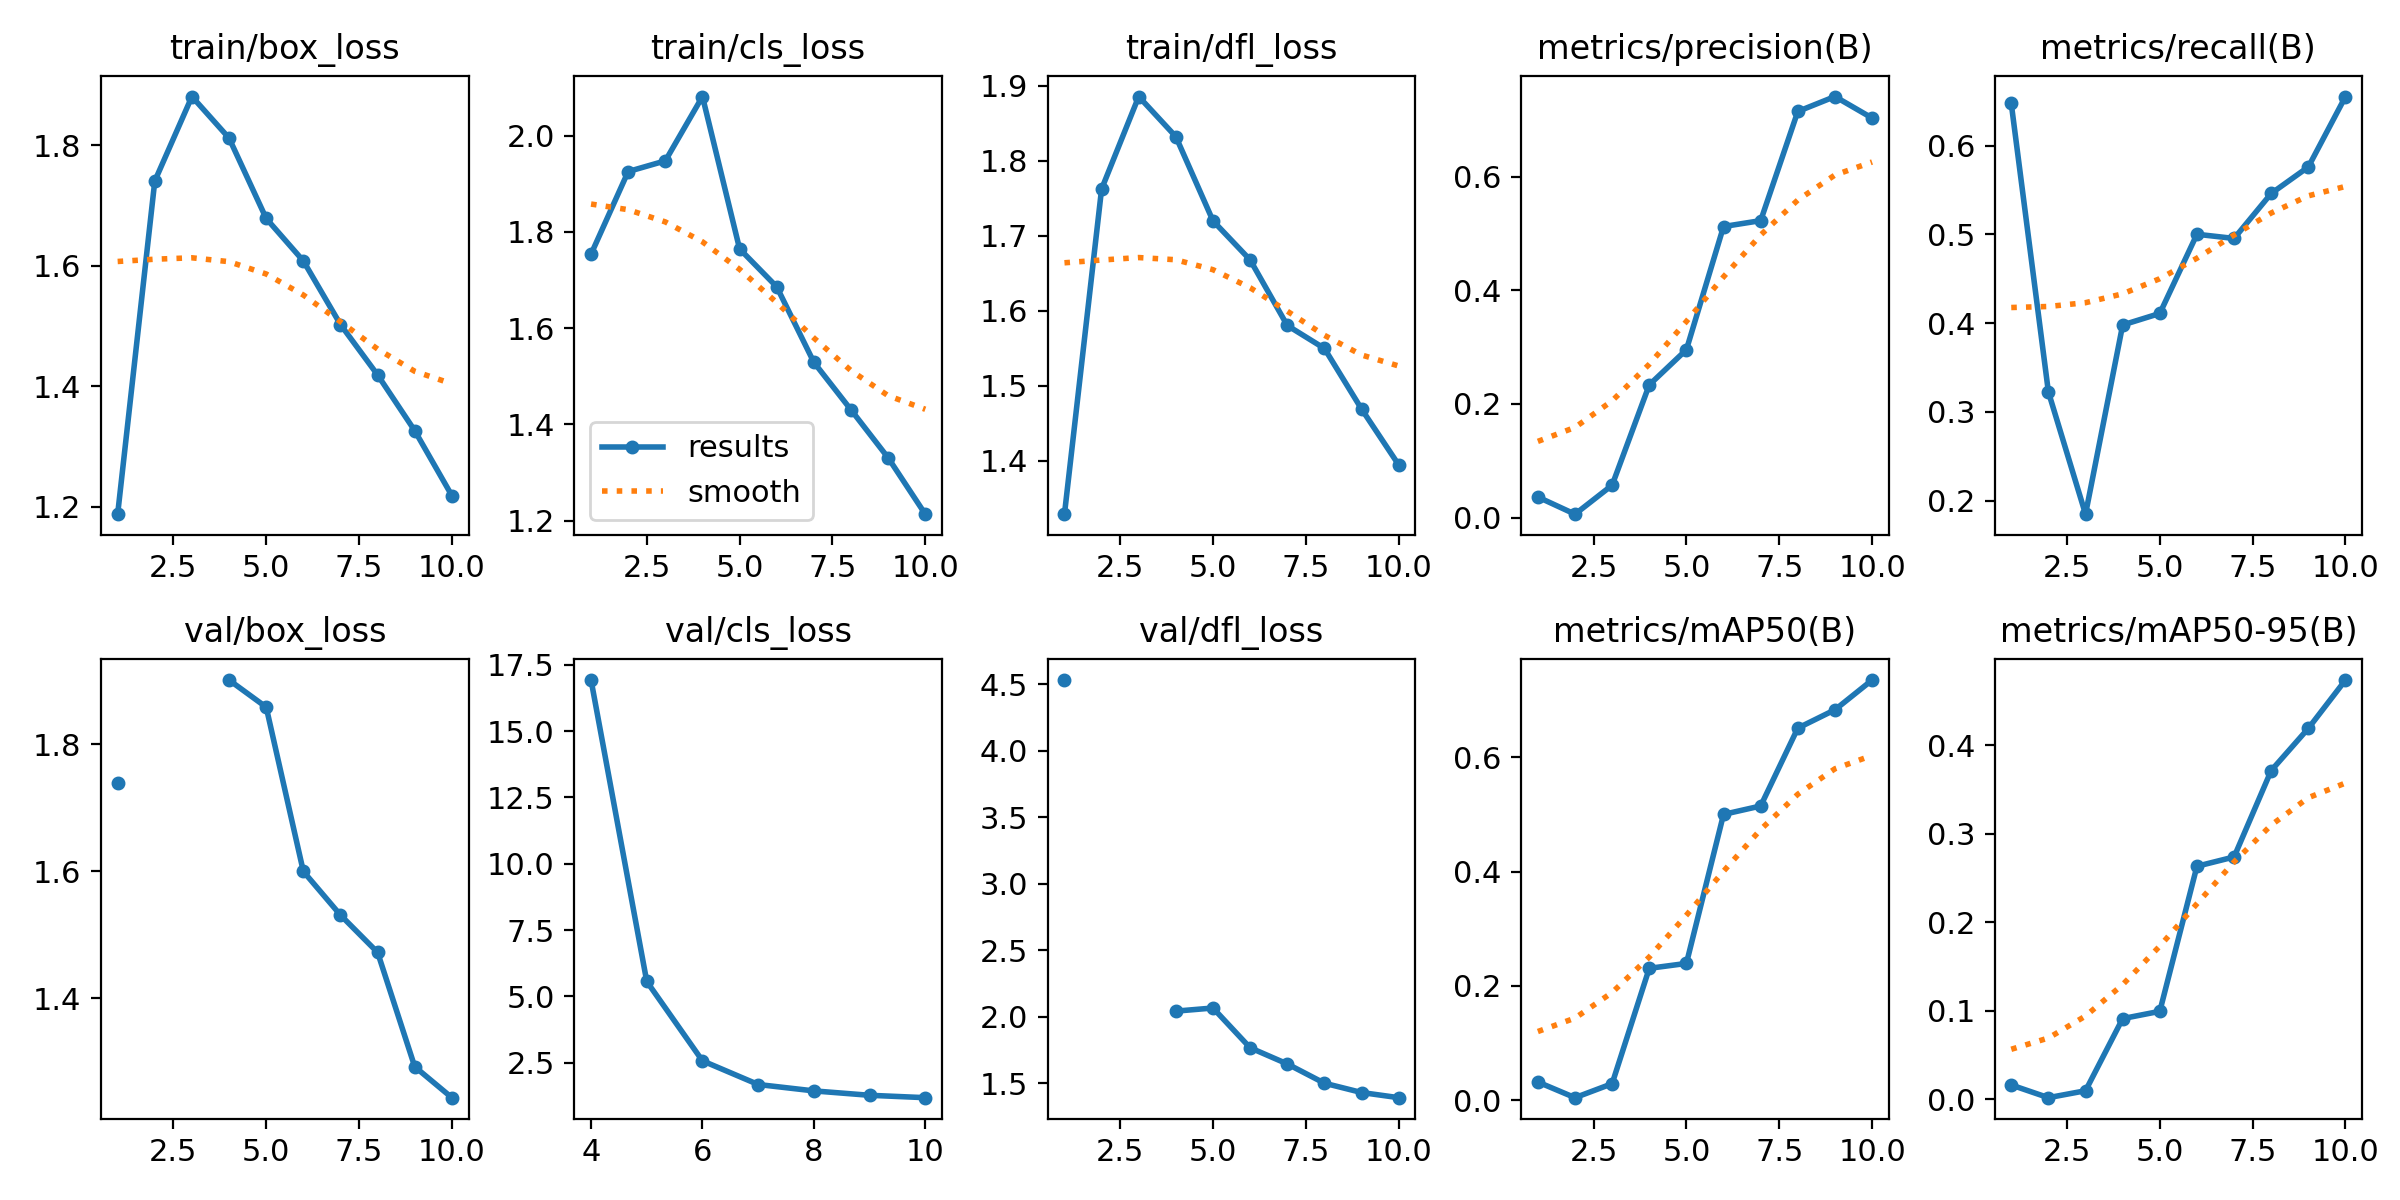

In [14]:
from IPython.display import Image

Image(filename='/content/runs/train/exp/results.png')